# Part 1: SVD on Attention Matrices

In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F  # For softmax

## Step 1: Compute Attention Weights

In [9]:
n = 512  # Sequence length
d = 64   # Embedding dim

# Random Q, K (normally from projections)
Q = torch.randn(n, d)
K = torch.randn(n, d)

# Attention scores
scores = torch.matmul(Q, K.T) / (d ** 0.5)

# Causal mask (upper triangle inf for autoregressive)
large_neg = -1e9
mask = torch.triu(torch.ones(n, n), diagonal=1) * large_neg
scores = scores + mask

# Attention weights
A = F.softmax(scores, dim=-1)
print(A.shape)

torch.Size([512, 512])


## Step 2: SVD Decomposition and Spectrum Plot

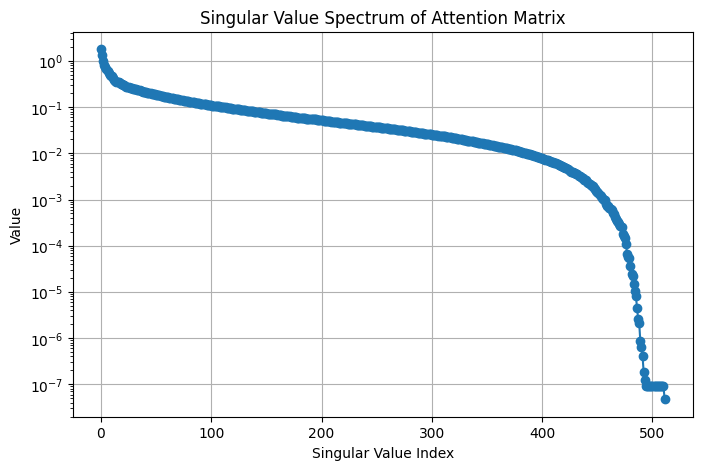

Effective rank: 456 (out of 512)


In [11]:
# SVD: U, S, Vh (Vh = V^T)
U, S, Vh = torch.linalg.svd(A, full_matrices=False)  # full_matrices=False is faster/memory-efficient

# Plot singular values
plt.figure(figsize=(8, 5))
plt.plot(S.cpu().numpy(), marker='o')
plt.title("Singular Value Spectrum of Attention Matrix")
plt.xlabel("Singular Value Index")
plt.ylabel("Value")
plt.yscale('log')  # Log scale to see decay clearly
plt.grid(True)
plt.show()

# Effective rank: e.g., values above 1e-3
effective_rank = (S > 1e-3).sum().item()
print(f"Effective rank: {effective_rank} (out of {n})")

## Derivation Notes

* "LoRA: Low-Rank Adaptation of Large Language Models" (2021).
* "Transformers are RNNs: Fast Autoregressive Transformers with Linear Attention" (2020).

Discuss: "Rapid decay confirms low-rank—links to LoRA for memory savings."

## Experiment: Compare Ranks

In [30]:
# Function for reuse
def compute_svd_rank(n, d, causal=True):
    # Random Q, K (normally from projections)
    Q = torch.randn(n, d)
    K = torch.randn(n, d)

    # Attention scores
    scores = torch.matmul(Q, K.T) / (d ** 0.5)

    # Causal mask (upper triangle inf for autoregressive)
    if causal:
        large_neg = -1e9
        mask = torch.triu(torch.ones(n, n), diagonal=1) * large_neg
        scores = scores + mask

    # Attention weights
    A = F.softmax(scores, dim=-1)

    # SVD: U, S, Vh (Vh = V^T)
    U, S, Vh = torch.linalg.svd(A, full_matrices=False)
    effective_rank = (S > 1e-3).sum().item()
    
    return effective_rank

ranks = [compute_svd_rank(512, 64), compute_svd_rank(512, 64, causal=False)]
print("Ranks:", ranks)

Ranks: [457, 500]
